In [18]:
from cpymad.madx import Madx
import numpy as np
import sys
import matplotlib.pyplot as plt 

# package to import files from Gitlab
import requests

# Setting up the MAD-X environment

The MAD-X input files can be either directly loaded from Gitlab or from the EOS optics repository. 

In [19]:
madx = Madx()

useEOS = True

if useEOS:
    # Loading files from EOS
    # call sequence file and eventually additional tools
    madx.call('/eos/project/a/acc-models/public/elena/elena.seq')
    #   Apertures:
    madx.call('/eos/project/a/acc-models/public/elena/elena.dbx')
    #   Split elements to allow inserting BPMs:
    madx.call('/eos/project/a/acc-models/public/elena/tools/splitEle_installBPM.madx')
    # call strenghts for a given scenario
    madx.call('/eos/project/a/acc-models/public/elena/scenarios/highenergy/highenergy.str')
    # define beam
    madx.call('/eos/project/a/acc-models/public/elena/scenarios/highenergy/highenergy.beam')
else:
    # Loading files from Gitlab
    # create sequence 
    aux_sequence = requests.get('https://gitlab.cern.ch/acc-models/acc-models-elena/raw/master/elena.seq')
    madx.input(aux_sequence.text)
    # split it to add BPMs 
    aux_add_BPMs = requests.get('https://gitlab.cern.ch/acc-models/acc-models-elena/raw/master/tools/splitEle_installBPM.madx')
    madx.input(aux_add_BPMs.text)
    # ...
    aux_strength = requests.get('https://gitlab.cern.ch/acc-models/acc-models-elena/raw/master/scenarios/highenergy/highenergy.str')
    madx.input(aux_strength.text)
    # define beam
    aux_beam     = requests.get('https://gitlab.cern.ch/acc-models/acc-models-elena/raw/master/scenarios/highenergy/highenergy.beam')
    madx.input(aux_beam.text)
    


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.09.28 17:39:36      +
  ++++++++++++++++++++++++++++++++++++++++++++
! ELENA ring Sequence -> LNR

!

!

! Changelog:

! -  5/06/2018: started with Pavel''s optics

!   - cleaned up some commented lines and added some markers

!   - redefined randomly some names of the e-cool solenoids

!   - TODO: 

!      - cleanup useless lines. re-arrange markers "badly" used here and there.

!      - rename non-existing quad 631 and 626 !!!

! - 24/11/2020: adjusted structure to new standards. Still a lot of work to do to make it LDB compatible.

! - Sep 2021: moving toward LDB-compatible model

!

! TODO: probably need to work on arc lenght for dipoles to match GEODE/drawings/LDB.





/************************************************************************************/

/*            

# Performing a Twiss

In [20]:
# start using ELENA sequence
madx.input('use, sequence = ELENA')

# cycle it to make nicer plots
madx.input('seqedit,sequence=ELENA;')
madx.input('flatten;')
madx.input('cycle,start=LNR.MMIDINJ;')
madx.input('endedit;')
madx.input('use, sequence=ELENA;')

# Make simple TWISS
madx.twiss()

# Make a PTC-TWISS
madx.input('ptc_create_universe')
madx.input('ptc_create_layout, time=false,model=2, method=6, nst=5, exact=true')
madx.input('ptc_twiss, closed_orbit, icase=56, no=4, slice_magnets')
madx.input('ptc_end')

++++++ info: seqedit - number of elements installed:  0
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
       30.40531278                 -0       0.2581716952        1.968093318 

                q1                dq1            betxmax              dxmax 
       2.361689845       -25.93420025        13.54753869        14.24332011 

             dxrms             xcomax             xcorms                 q2 
       11.94807398                  0                  0        1.389925725 

               dq2            betymax              dymax              dyrms 
      -14.90495652        4.571798476  

True

# Print non-zero entries of the summary tables

In [21]:
print('------------------------------------')
print('   Summary table from TWISS:')
twiss = madx.table['summ']
for k in twiss.keys():
    if twiss[k][0] > 0:
        print(k + ' = ' + str(twiss[k][0]))

print('------------------------------------')
print('   Summary table from PTC-TWISS:')
twiss = madx.table['ptc_twiss_summary']
for k in twiss.keys():
    if twiss[k][0] > 0:
        print(k + ' = ' + str(twiss[k][0]))

------------------------------------
   Summary table from TWISS:
length = 30.40531277975547
alfa = 0.2581716951511708
gammatr = 1.9680933179388473
q1 = 2.361689845033131
betxmax = 13.547538687031402
dxmax = 14.243320112863053
dxrms = 11.94807398025054
q2 = 1.3899257249039796
betymax = 4.571798475634733
------------------------------------
   Summary table from PTC-TWISS:
length = 30.405312779755437
alpha_c = 0.2581716951511709
alpha_c_p = 0.07498606955764875
alpha_c_p3 = 5.679540133828253
gamma_tr = 1.9680933179388467
q1 = 0.36168984503313445
q2 = 0.38992572490397887
beta_x_min = 0.4903450065409587
beta_x_max = 13.547538687031015
beta_y_min = 2.6916518292496097
beta_y_max = 4.571798475634801
beta11min = 0.4903450065409587
beta11max = 13.547538687031015
beta22min = 2.6916518292496097
beta22max = 4.571798475634801
disp1max = 1.509488307015289
disp2max = 0.5362309836758167
tcorms = 0.013506755066722444


# Plot the optics functions

Text(0, 0.5, '[m]')

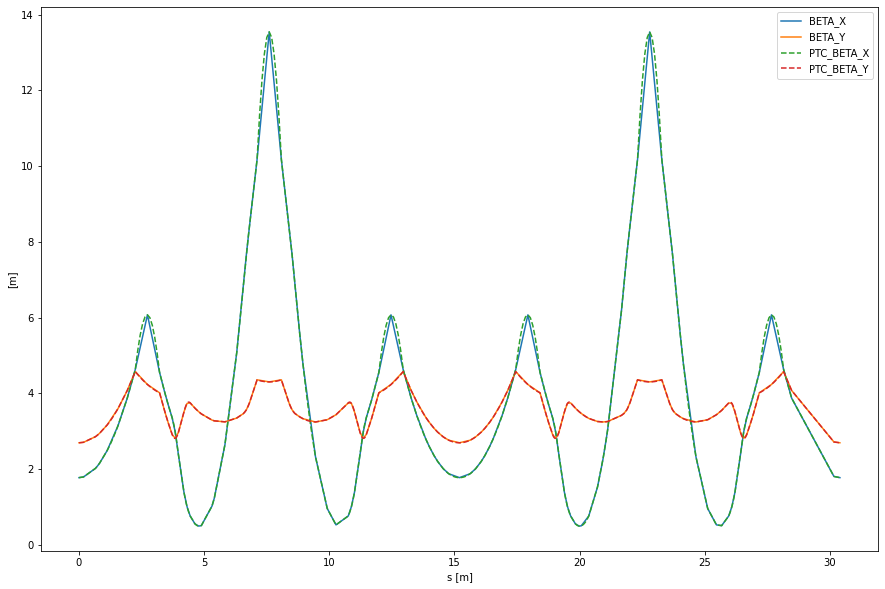

In [22]:
twiss = madx.table['twiss']
ptc_twiss = madx.table['ptc_twiss']

plt.figure(figsize=(15,10))
plt.plot(twiss['S'], twiss['BETX'])
plt.plot(twiss['S'], twiss['BETY'])
plt.plot(ptc_twiss['S'], ptc_twiss['BETA11'],'--')
plt.plot(ptc_twiss['S'], ptc_twiss['BETA22'],'--')
plt.legend(['BETA_X', 'BETA_Y', 'PTC_BETA_X', 'PTC_BETA_Y'])
plt.xlabel('s [m]')
plt.ylabel('[m]')